# Ward法

# [目的]<br>Ward法になれる

## import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
%matplotlib inline
# from matplotlib.font_manager import FontProperties
import japanize_matplotlib

[データセット]\
2014年のデータ二人以上の世帯３か月平均\
９月１日から11月30日までの３か月間

In [2]:
# データセットを読み込み
df = pd.read_csv("Household.csv", encoding = "shift-jis")
Pref = df.iloc[:,0]
Data = df.iloc[:,1:]

In [3]:
Pref.head()

0    北海道
1    青森県
2    岩手県
3    宮城県
4    秋田県
Name: Pref, dtype: object

In [4]:
Data.head()

,food,housing,utilities,medical,communication,education
0,64968,18060,22031,11595,42764,8422
1,62107,13657,25018,11145,39585,6839
2,67455,16232,24239,12195,52568,8288
3,70228,14673,23578,12777,51896,10863
4,67404,12437,25468,10770,44346,6224


(1) 食料\
　　　　穀類，魚介類，肉類，乳卵類，野菜・海藻，果物，油脂・調味料，菓子類，調理食品，飲料，酒類，外食\
(2) 住居\
　　　　家賃地代，設備修繕・維持（住宅の増改築費は含まれない。）\
(3) 光熱・水道\
　　　　電気代，ガス代，他の光熱，上下水道料\
(4) 保健医療\
　　　　医薬品，健康保持用摂取品，保健医療用品・器具，保健医療サービス（理・美容費は含まれない。）\
(5) 交通・通信\
　　　　交通，自動車等関係費，通信\
(6) 教育\
　　　　授業料等，教科書・学習参考教材，補習教育

In [5]:
Data.describe()

,food,housing,utilities,medical,communication,education
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,69632.978723,15441.212766,21396.680851,12433.872340,46009.595745,11080.595745
std,4964.988439,3295.188857,2169.540305,1122.736808,4311.962076,3679.293905
min,59249.000000,10049.000000,17944.000000,9686.000000,35533.000000,4876.000000
25%,66337.500000,13053.500000,19824.000000,11601.000000,43290.500000,8358.500000
50%,69237.000000,15324.000000,21076.000000,12481.000000,46366.000000,10190.000000
75%,73984.500000,17280.500000,22386.500000,13156.500000,47872.500000,13348.000000
max,81418.000000,28610.000000,28526.000000,14647.000000,59189.000000,18962.000000


## デンドログラムの作成

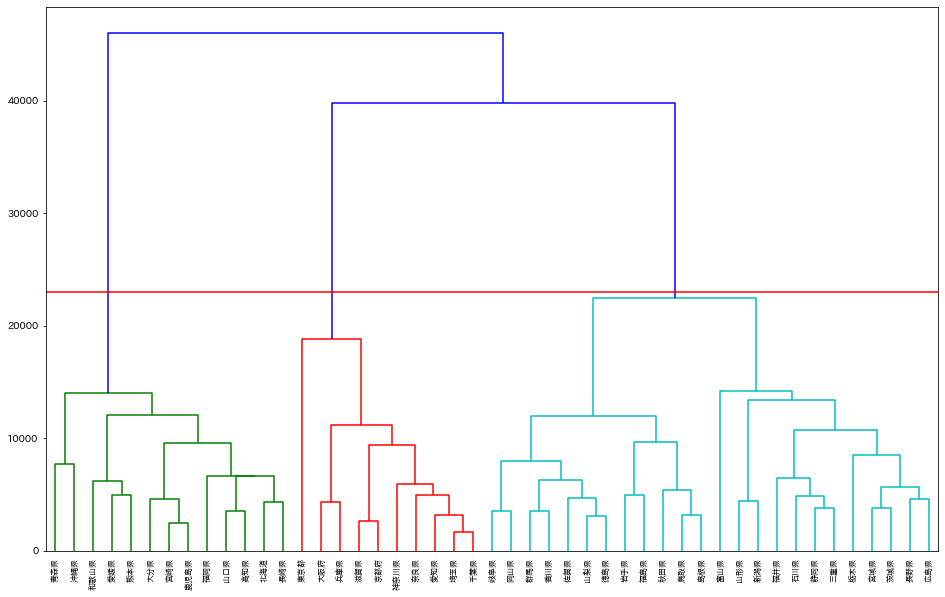

In [6]:
# 階層型クラスタリングの実施
# ウォード法 x ユークリッド距離
linkage_result = linkage(Data, method='ward', metric='euclidean')

# クラスタ分けする閾値を決める
threshold = 0.5 * np.max(linkage_result[:, 2])

# 階層型クラスタリングの可視化
# fp = FontProperties(fname=r'c:\Windows\Fonts\meiryo.ttc')
plt.figure(figsize=(16, 10)) 
dendrogram(linkage_result, labels=list(Pref), color_threshold=threshold)
plt.axhline(y=threshold, color='red')
plt.show()

## クラスタの詳細

In [7]:
# クラスタリング結果の値を取得
clustered = fcluster(linkage_result, threshold, criterion='distance')
num_clus = clustered.max()  # クラスタ数を取得

# Pandasのデータフレームにクラスタ番号を追加
df["cluster_id"] = clustered

# 各クラスタに属するサンプル数の分布
print(df["cluster_id"].value_counts())

# 各クラスタの各部門商品の購買額の平均値のデータフレームを作成
cluster_info = pd.DataFrame()
for i in range(1,num_clus+1):
    cluster_info['cluster' + str(i)] = df[df['cluster_id'] == i].mean()
    print(df[df['cluster_id'] == i].iloc[:,:-1])
    print("**************************************")

3    24
1    13
2    10
Name: cluster_id, dtype: int64
    Pref   food  housing  utilities  medical  communication  education
0    北海道  64968    18060      22031    11595          42764       8422
1    青森県  62107    13657      25018    11145          39585       6839
29  和歌山県  67256    10049      19475     9686          43337       8295
34   山口県  67598    15852      18880    12532          43439       7667
37   愛媛県  66227    13935      19835    11524          39758      11684
38   高知県  66144    16789      18644    11375          40632       7816
39   福岡県  66153    18732      19159    12174          45759      11413
41   長崎県  62254    19071      19799    11607          40658       9324
42   熊本県  63938    10879      19304    12798          42256      10190
43   大分県  62654    15651      18635    12877          43611       4876
44   宮崎県  62442    14013      17944    11438          43244       8964
45  鹿児島県  60830    15324      18526    11753          43029       7736
46   沖縄県  59249    176

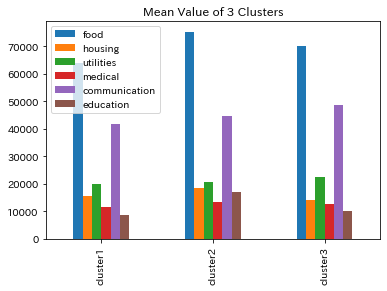

In [8]:
# cluster_infoから余分な列'cluster_id'を削除
cluster_info = cluster_info.drop('cluster_id')

# 可視化(積み上げ棒グラフ)
my_plot = cluster_info.T.plot(kind='bar', title="Mean Value of "+str(num_clus)+" Clusters")
# plt.savefig(str(num_clus) + "cluster_ward.png")  # グラフを保存
plt.show()

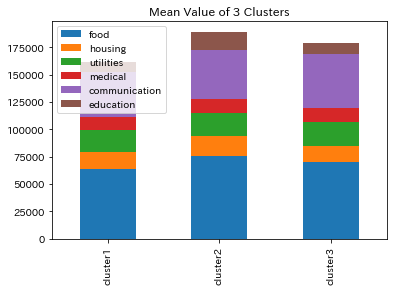

In [10]:
# 可視化(積み上げ棒グラフ)
my_plot = cluster_info.T.plot(kind='bar', stacked=True, title="Mean Value of "+str(num_clus)+" Clusters")
# plt.savefig(str(num_clus) + "cluster_ward.png")  # グラフを保存
plt.show()

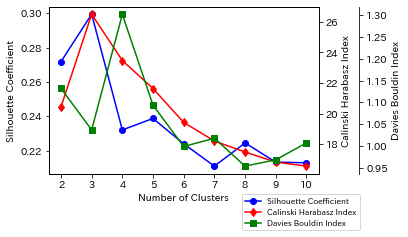

In [11]:
# クラスタ数ごとに，Sihouette Coefficient，Calinski-Harabasz Index, Davies-Bounldin Indexを計算する
silhouette_coefficient = []
calinski_harabasz_index = []
davies_bouldin_index = []

for num_clus in range(2,11):
    labels = fcluster(linkage_result, t=num_clus, criterion='maxclust')

    silhouette_coefficient.append(silhouette_score(Data, labels))
    calinski_harabasz_index.append(calinski_harabasz_score(Data, labels))
    davies_bouldin_index.append(davies_bouldin_score(Data, labels))

# 結果をグラフに表示
fig = plt.figure()
fig.subplots_adjust(bottom=0.3,right=0.75)  # 図の余白を調整
host = fig.add_subplot(111)  # グラフの追加

# 縦軸の追加
# x軸が共通でy軸が異なるグラフが書ける
par1 = host.twinx()
par2 = host.twinx()

# プロット
p0, = host.plot(range(2,11), silhouette_coefficient, 'bo-', label='Silhouette Coefficient')
p1, = par1.plot(range(2,11), calinski_harabasz_index, 'rd-', label='Calinski Harabasz Index')
p2, = par2.plot(range(2,11), davies_bouldin_index, 'gs-', label='Davies Bouldin Index')

# 軸ラベル
host.set_xlabel('Number of Clusters')
host.set_ylabel('Silhouette Coefficient')
par1.set_ylabel('Calinski Harabasz Index')
par2.set_ylabel('Davies Bouldin Index')

# 軸の位置の調整
par2.spines['right'].set_position(('axes', 1.15))

# 凡例
lines = [p0, p1, p2]
host.legend(lines,
            [l.get_label() for l in lines],
            fontsize=8,
            bbox_to_anchor=(0.7, -0.1),  # 凡例の枠の，図全体に対する相対的な位置
            loc='upper left'
            )
plt.show()